## **Examen 1 - Análisis Cuantitativo**
### Luis Felipe Montenegro Fuentes

## **<span style="color:darkred"> Solución Pregunta 5 </span>**


#### Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength) en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado grueso (Coarse aggregate) y el agregado fino (Fine aggregate). Para ello se dispone de un conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple para predecir la resistencia a la compresión del concreto en función de las variables predictoras.



<span style="color:darkred">
<ul>
 

 <li>5.1. Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del conjunto de datos. </li>

 </ul>
</span

In [1]:
# Carga de las librerías necesarias para llevar a cabo los procedimientos

#Librerías

import pandas as pd
import numpy as np

# Librerías de visualización

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Matplotlib y  seaborn para gráficos
import matplotlib.pyplot as plt
import matplotlib


import seaborn as sns

# No muestra warnings que no son determinantes para el proceso

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Se lleva a cabo la carga de la información necesaria para trabajar el caso propuesto

data_concrete = pd.read_excel("Concrete_Data.xls", sheet_name="Sheet1")

<span style="color:darkred">
<ul>
 

 <li>5.2. Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta.</li>

 </ul>
</span

Inicialmente, se lleva a cabo una identificación de los **tipos de variables** del DataSet.

| Columna | Descripción | Tipo | Rango / No. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| Cement | Cantidad de cemento en kg/m<sup>3</sup> de la mezcla | Cuantitativa Continua | Rango: [102,0 - 540,0] |
| Blast Furnace Slag | Cantidad de escoria de alto horno en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [0,0 - 359,4] |
| Fly Ash | Cantidad de ceniza volante en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [0,0 - 200,1] |
| Water | Cantidad de agua en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [121,8 - 247,0] |
| Superplasticizer | Cantidad de superplastificante en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [0,0 - 32,2] |
| Coarse Aggregate | Cantidad de agregado grueso en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [801,0 - 1145,0] |
| Fine Aggregate | Cantidad de agregado fino en kg/m<sup>3</sup> de la mezcla |Cuantitativa Continua | Rango: [594,0 - 992,6] |
| Age | Edad del concreto en días |Cuantitativa Continua | Rango: [594,0 - 992,6] |
| Concrete compressive strength | Resistencia a la comprensión del concreto en MPa |Cuantitativa Continua | Rango: [2,33 - 82,60] |



**Dominio de los datos:** teniendo en cuenta la información proporcionada, el contexto de los datos hace alusión a los materiales o estructuras de concreto que se utilizan para elaborar proyectos de construcción como edificaciones, viviendas, entre otros. 

Por su parte, las variables como el cemento, la escoria, ceniza volante, agua, superplastificante, agregado grueso y fino, corresponden a aquellos componentes que se usan para llevar a cabo mezclas de concreto, que son indispensables para asegurar caracterísitcas de calidad, durabilidad y resistencia en los contextos en los que dichos materiales se utilicen.

#### Revisión de la estructura del dataset:

In [3]:
data_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

**Análisis:** se identificó que en el dataset otorgado existen un total de 1.030 registros que recogen diferentes composiciones de los materiales mencionados anteriormente. 

Por su parte, se encontraron un total de 9 columnas que corresponden a las 8 variables que posteriormente se utilizaran como posibles variables predictoras de la novena variable del conjunto de datos: resistencia a la comprensión del concreto.

Finalmente, se destaca como se vio en el cuadro anterior que todas las variables son cuantitativas continuas y no se identificó la presencia de datos nulos.

In [4]:
#Buscando optimizar la visualización de la información, renombramos las variables del dataset

new_columns = {

    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Compressive strength',
}

# Ejecutando las nuevas etiquetas

df_concrete = data_concrete.rename(columns=new_columns)

df_concrete.head(5)

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse,Fine,Age,Compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### Estadísticas Descriptivas (se analizan algunas variables del dataset):

In [5]:
# Construcción de una función que nos permita calcular las estadísticas descriptivas:

from scipy.stats import skew, kurtosis 

def tabla_descriptivas_completa (columnas):

    tabla_descriptivas_completa=pd.DataFrame(columnas.describe())
    tabla_descriptivas_completa.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas_completa.loc['skew']=skew(columnas)
    tabla_descriptivas_completa.loc['kurtosis']=kurtosis(columnas)

    return tabla_descriptivas_completa

In [6]:
tabla_descriptivas_completa(df_concrete)

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse,Fine,Age,Compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225
coef. variation,0.371692,1.167583,1.181027,0.117619,0.962983,0.079918,0.103642,1.383420,0.466407
skew,0.508775,0.799571,0.536662,0.074216,0.906790,-0.040148,-0.252611,3.264415,0.416315


**Análisis:**

<ul>
 

 <li>En el caso del cemento, se observa que la cantidad media necesaria que expone este primer componente para la mezcla de concreto corresponde a 281.1 kg/m<sup>3</sup>. Por su parte, el coeficiente de variación correspondiente a 37,1%, sugiere una dispersión moderada de los datos.</li>


 <li>Con respecto a la escoria, se evidencia que la cantidad promedio en términos de kg/m<sup>3</sup> es de 73,9. En este caso, se encontró una alta dispersión en los datos, explicada por un coeficiente de variación de 116,8%. Finalmente, se destaca que el sesgo de 0,80 sugiere una asimetría hacia la derecha (positiva).</li>

 <li>Teniendo en cuenta la tabla, el 75% de las mezclas identificadas en el dataset vinculan entre sus componentes una cantidad de ceniza volante igual o menor a 118,3 kg/m<sup>3</sup>, por su parte, el coefieciente de variación (118,1%) evidencia la presencia de alta disperisón de los datos.</li>

 <li>En el caso del agua, se observa que la cantidad media utilizada en las diferentes mezclas de concreto evienciadas en el dataset corresponde 181,6 kilogramos por metro cúbico. Aquí, se destaca que la curtósis correspondiente a 0,11 sugiere una forma de distribución puntiaguda en el centro de los datos.</li>
 
 <li>Dado el contexto, la edad del concreto actúa como una variable interesante para estudiar la capacidad que tiene el mismo para soportar cargas. En ese sentido, se encontró que la edad media del concreto en este dataset corresponde a 45,7 días. No obstante, se observó también que hay una alta dispersión de los datos explicada por un coeficiente de variación de 138,3%. Finalmente, el 75% de las observaciones evidencia un edad igual o menor a 56 días.</li>

 <li>Finalmente, concentrandonos en la variable objetivo, se identificó que la resistencia media a la comprensión del concreto se acerca a los 35,8 MPa, también, a través del coeficiente de variación (46,6%) se evidencia una dispersión moderada de los datos. Finalmente, se destaca que la resistencia máxima a la comprensión de este material es de 82,6 MPa.  </li>

  

 </ul>

#### Análisis Gráfico:

Se realizará un análisis basado en la graficación de histogramas para conocer visualmente cómo se comparta la distribución de los datos para cada una de las variables en el Dataset. También, se propondrá una análisis a través de gráficos de caja para revisar la presencia de datos nulos y finalmente se analizará cuál es el comportamiento de la correlación entre las variables explicativas y la variable objetivo. 

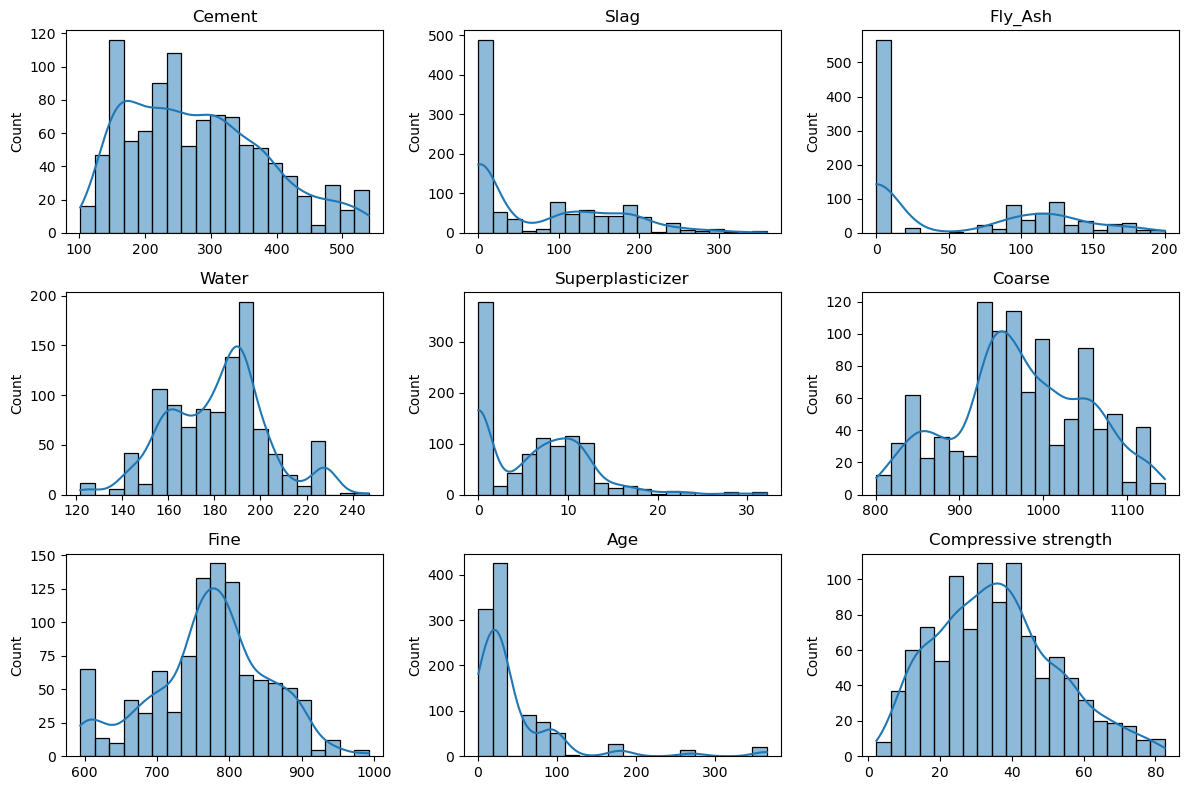

In [6]:
'''Histogramas'''

# Configuración del diseño del gráfico

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Configuración de los histogramas para cada variable del Dataset

for i, column in enumerate(df_concrete.columns):
    ax = plt.subplot(3, 3, i + 1)
    sns.histplot(df_concrete[column], kde=True, bins=20, legend=False, ax=ax)
    ax.set_xlabel('') 
    plt.title(column)

plt.tight_layout()
plt.show()

**Análisis:**

Inicialmente, en términos gráficos se observa que el agua, el agregado grueso y el fino, son los componentes que exhiben los mejores comportamientos en términos de las distribuciones, lo cual puede generar un menor impacto en el sesgo de las predicciones que se pretenden realizar para la resistencia de la comprensión del concreto. Adicionalmente, la cercanía de estas distribuciones a un comportamiento normal, exhibe una menor variabilidad en los datos que serán utilizados para el modelo de regresión. 

De otro lado, el sesgo positivo que se presenta en la variable "Edad" puede generar posteriormente un problema de subestimación de la resistencia a la compresión del concreto, debido a que la alta concentración de los datos cercanos a 0 puede generar una menor precisión en la predicción de dicha resistencia para el concreto que evidencie una edad avanzada en términos de los días.

Ahora bien, teniendo en cuenta que cada registro expone los componentes de la mezcla del concreto, se observa que la gran mayoría de las mezclas en este conjunto de datos exhibe una cantidad mínima de este material. Este resultado, puede representar problemas en la generalización del modelo frente a situaciones o casos en los que este componente tenga una concentración o presencia más importante en otros tipos de mezclas. 

Finalmente, la variable objetivo gráficamente exhibe un comportamiento cercano a una distribución normal con un leve sesgo hacia la derecha, lo que sugiere que el uso de un modelo lineal podría ser adecuado para la estimación de la comprensión del concreto. 

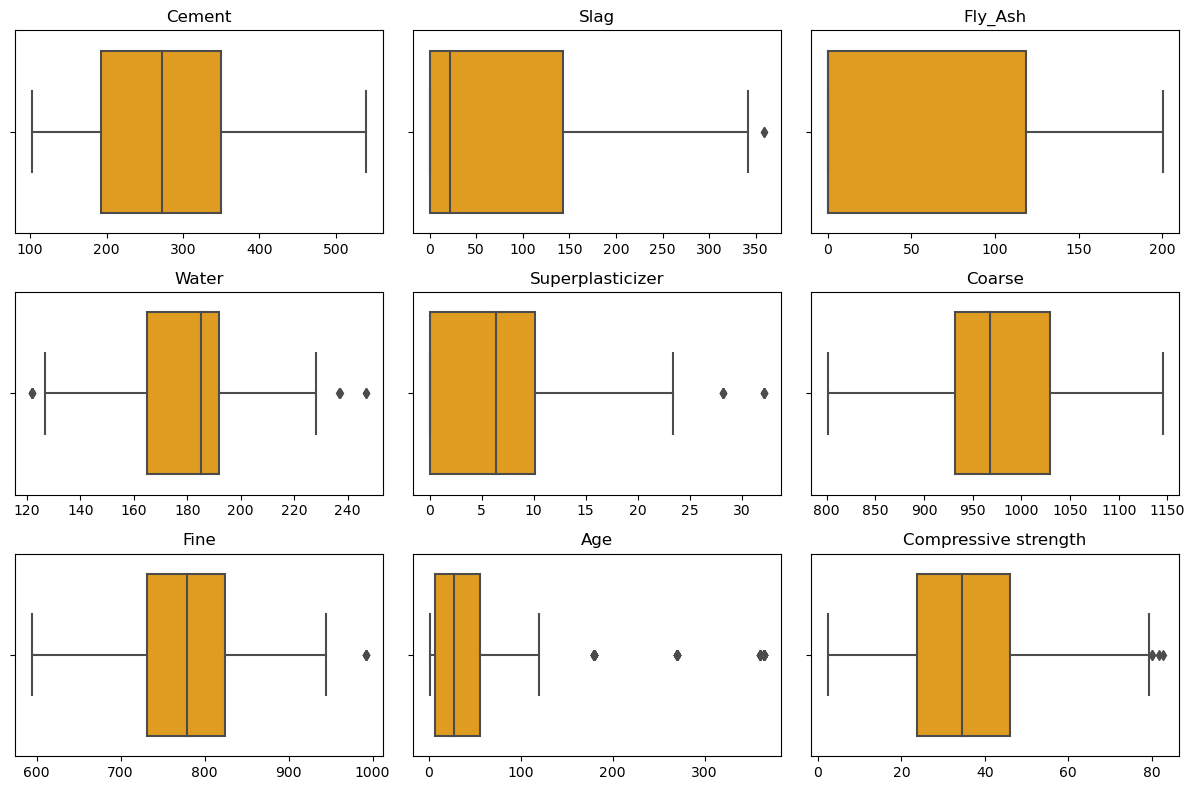

In [7]:
'''Boxplot'''

# Configuración del diseño del gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Configuración de los boxplots para cada variable del Dataset
for i, column in enumerate(df_concrete.columns):
    ax = plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_concrete[column], orient='h', color='orange', ax=ax)
    ax.set_xlabel('') 
    plt.title(column)

plt.tight_layout()
plt.show() 

**Análisis:**

A través del análisis gráfico con los Box Plots, se evidencia la presencia de algunos valores atípicos en las variables Water, Superplasticizer, Fine y Compressive Strenght. Sin embargo, se destaca que en la variable Age la presencia y ubicación de los outliers es la más alejada del tercer cuartil, es decir donde están concentrado el 75% de los datos. 

Para una estimación posterior de un modelo de regresión lineal, este comportamiento de datos atípicos podría generar una afectación en la precisión de las predicciones que realice el modelo acerca de la comprensión del concreto, también, puede generar algún tipo de sesgo en la estimación de los coeficientes de cada una de las variables explicativas.

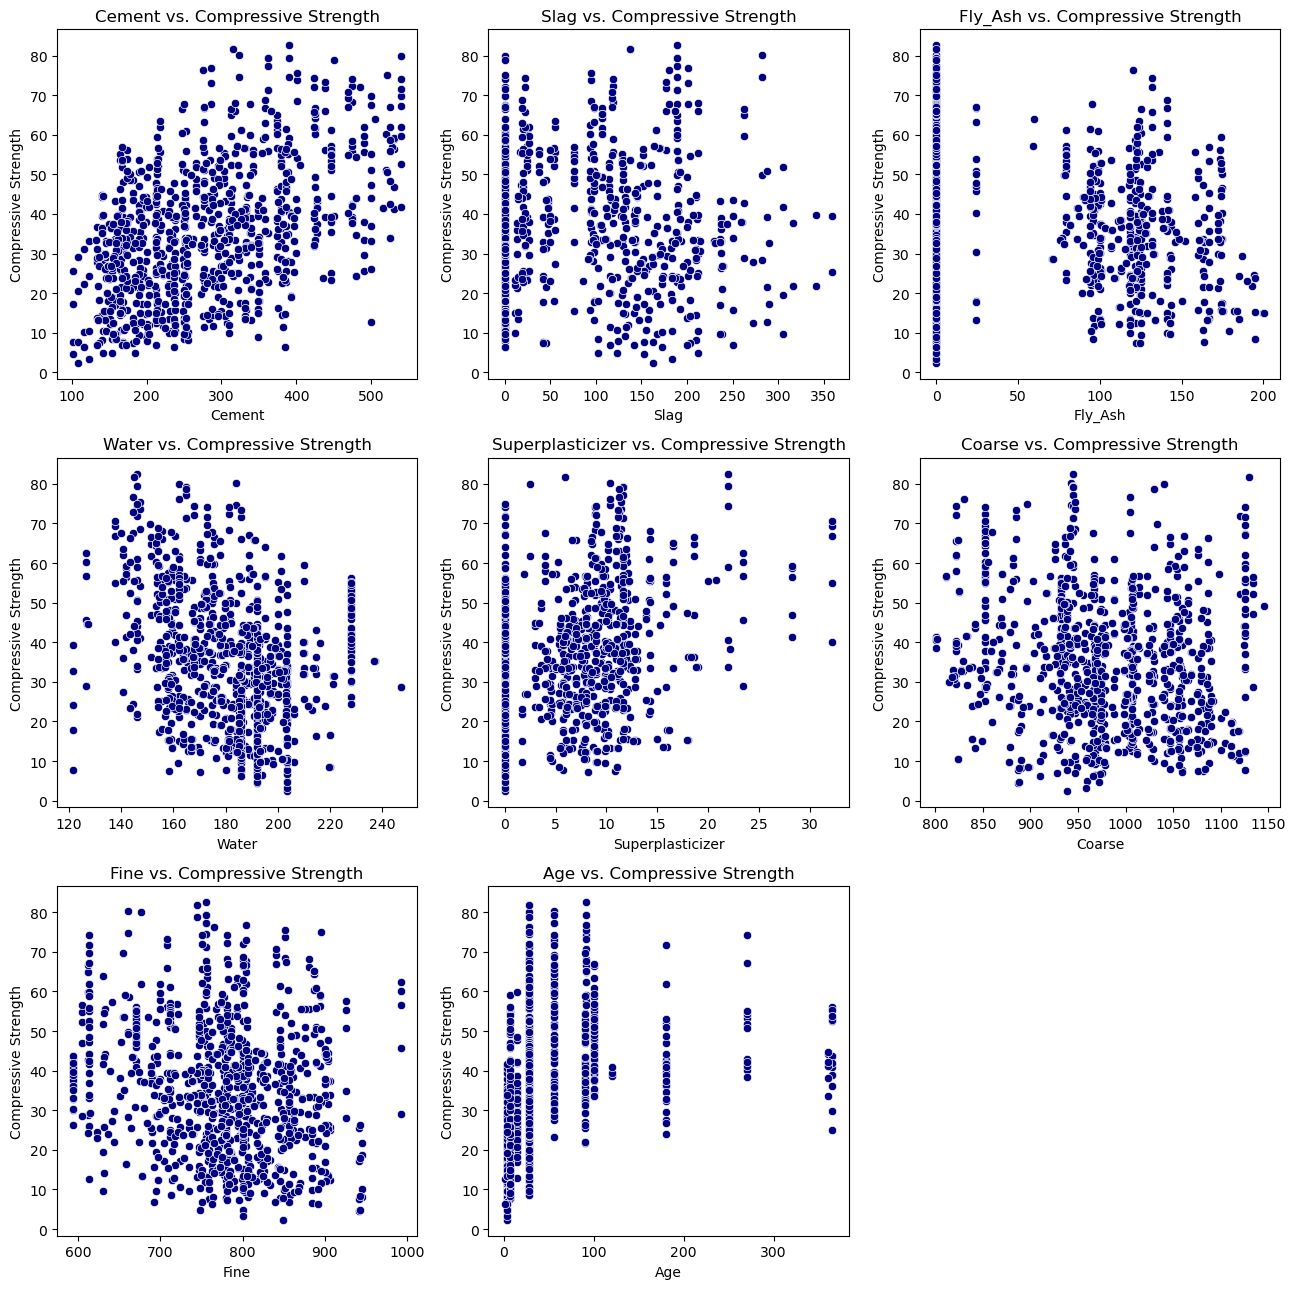

In [8]:
'''Gráficos de Dispersión'''


# Configuración del diseño del gráfico
plt.figure(figsize=(13, 13))
plt.subplots_adjust(hspace=0.9)

# Configuración de los gráficos de dispersión para cada variable del Dataset
for i, column in enumerate(df_concrete.columns[:-1]):  # Excluir la última columna (variable objetivo)
    ax = plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df_concrete[column], y=df_concrete['Compressive strength'], color='navy', ax=ax)
    plt.xlabel(column)
    plt.ylabel('Compressive Strength')
    plt.title(f'{column} vs. Compressive Strength')

plt.tight_layout()
plt.show()

**Análisis:**

El análisis gráfico de la dispersión entre las variables explicativas frente a la resistencia a la comprensión del concreto, permite observar que la única variable que evidencia una forma elíptica es la relación entre la variable objetivo y la variable "Cement". Este resultado indica una posible relación lineal entre las variables mencionadas, lo que permitiría aplicar la correlación de pearson para llevar a cabo una evualuación de la fuerza y la dirección de dicha relación. 

Aquí es importante destacar que, la correlación de Pearson es una medida enfocada en capturar relaciones linerales entre variables, por tanto, la relación entre el cemento y la resistencia a la comprensión del concreto puede ser abordada a través de un modelo lineal. 

No obstante, en las otras variables se observan agrupaciones irregulares, que necesitarían utilizar modelos o aproximaciones alternativas para identificar la relación entre las variables explicativas y la variable objetivo (Kendall o Spearman), debido a que la correlación de Spearman solo funciona cuando las distribuciones son simétricas y es una medida sensible ante valores atípicos. 



In [9]:
'''Matriz de Correlación'''

correlation_matrix = df_concrete.corr()
print(correlation_matrix)

                        Cement      Slag   Fly_Ash     Water  \
Cement                1.000000 -0.275193 -0.397475 -0.081544   
Slag                 -0.275193  1.000000 -0.323569  0.107286   
Fly_Ash              -0.397475 -0.323569  1.000000 -0.257044   
Water                -0.081544  0.107286 -0.257044  1.000000   
Superplasticizer      0.092771  0.043376  0.377340 -0.657464   
Coarse               -0.109356 -0.283998 -0.009977 -0.182312   
Fine                 -0.222720 -0.281593  0.079076 -0.450635   
Age                   0.081947 -0.044246 -0.154370  0.277604   
Compressive strength  0.497833  0.134824 -0.105753 -0.289613   

                      Superplasticizer    Coarse      Fine       Age  \
Cement                        0.092771 -0.109356 -0.222720  0.081947   
Slag                          0.043376 -0.283998 -0.281593 -0.044246   
Fly_Ash                       0.377340 -0.009977  0.079076 -0.154370   
Water                        -0.657464 -0.182312 -0.450635  0.277604   

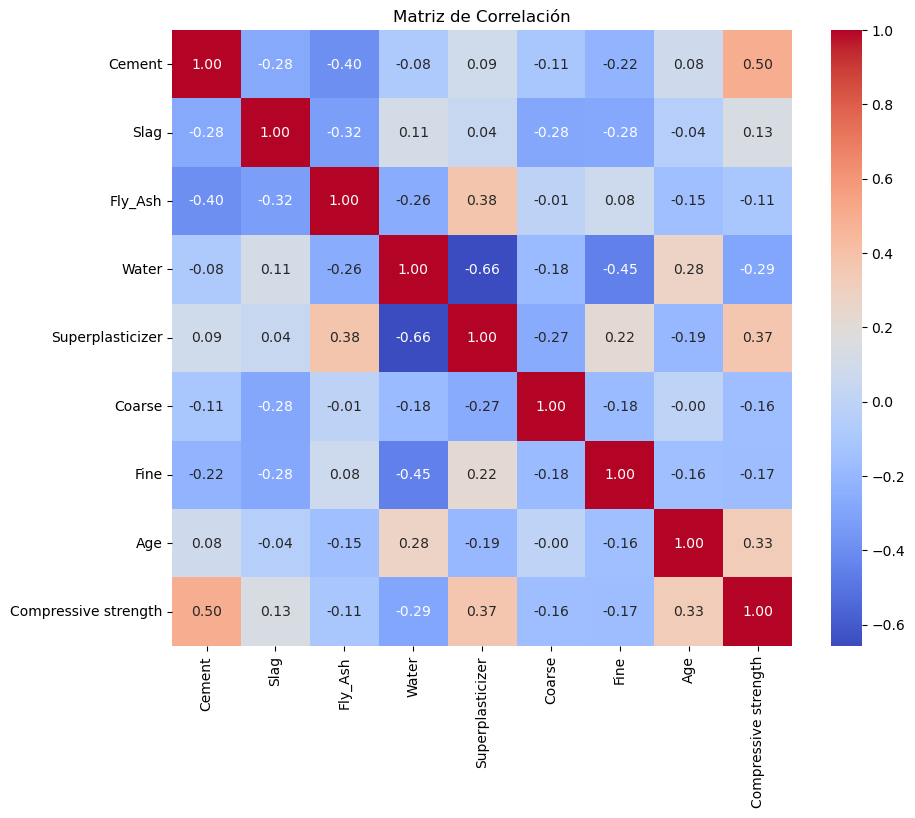

In [10]:
'''Mapa de calor'''


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Análisis:**

A través del método "Corr" se identificó que la variable "Cement" es aquella que presenta la relación más fuerte frente a la resistencia a la compresión del concreto. Esto debido a que se evidencia una correlación positiva de 0,50, que según Sarabia (2021), sugiere una correlación positiva moderada entre la cantidad de cemento utilizada en la mezcla y la resistencia del concreto. 

Por otro lado, se observó que para las variables "Superplasticizer" (0,37) y "Age" (0,33) existe una correlación positiva débil frente a la variable objetivo. Estos valores sugieren que a pesar de que dichas variables tienen cierta influencia sobre la resistencia del concreto, el efecto no es tan determinante como la cantidad de cemento utilizada. 


<span style="color:darkred">
<ul>
 

 <li>5.3. Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalue si hay significancia en el modelo.</li>

 </ul>
</span

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# División de los datos en variables predictoras (X) y variable objetivo (y)

X = df_concrete.drop(columns=['Compressive strength'], axis=1)
y = df_concrete['Compressive strength']

# Se añade una columna de 1's para el término independiente

X = sm.add_constant(X)

# Entrenamiento del modelo de regresión lineal utilizando OLS (Mínimos Cuadrados Ordinarios)

model = sm.OLS(y, X)
results = model.fit()

# Resumen completo del modelo

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Compressive strength   R-squared:                       0.615
Model:                              OLS   Adj. R-squared:                  0.612
Method:                   Least Squares   F-statistic:                     204.3
Date:                  Sat, 13 Apr 2024   Prob (F-statistic):          6.76e-206
Time:                          17:06:00   Log-Likelihood:                -3869.0
No. Observations:                  1030   AIC:                             7756.
Df Residuals:                      1021   BIC:                             7800.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -

**Análisis:**

Se llevó a cabo el cálculo de un modelo de regresión lineal múltiple a través del Método de Mínimos Cuadrados Ordinarios (OLS), de este se puede interpretar los siguiente:

*El coeficiente de determinación, indica que el 61% de la variabilidad en la resistencia a la comprensión del concreto es explicada por las variables independientes que se incluyeron en el modelo. 

*Ahora bien, la prueba de significancia del modelo evalúa si al menos una de las variables predictoras tiene un efecto significativo sobre la variable dependiente. En este caso, la prueba de hipótesis se plantea de la siguiente manera: 


- Ho: todos los coeficientes del modelo son iguales a 0
- H1: al menos uno de los coeficientes del modelo es diferente de 0

Para este modelo específico el, el valor F es menor al nivel de significancia al 5%, por tanto, se rechaza la hipótesis nula y se puede afirmar que al menos una de las variables explicativas del modelo tiene un efecto significativo sobre la resistencia a la comprensión del concreto (variable dependiente). En resumen, hay evidencia de significancia en el modelo propuesto.



<span style="color:darkred">
<ul>
 

 <li>5.4. Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando el Adj − R2 y los criterios de información de Akaike y de Bayes (AIC y BIC).</li>

 </ul>
</span

**Análisis de significancia estadística de variables independientes:**

Teniendo en cuenta la salida proporcionada en el punto anterior, en la que se plantea un modelo de regresión múltiple que explica la resistencia a la comprensión del concreto explicada por el cemento, la escoria, la ceniza volante, el agua, el superplastificante, el agregado grueso, el agregado fino y la edad del concreto, tenemos lo siguiente:

La signifancia de los coeficientes que acompañan a las variables predictoras se evalúa a través del valor "p" otorgado en el modelo, para este contexto, la prueba de hipótesis se plantea de la siguiente manera:

- Ho: el coeficiente es igual a cero
- H1: el coeficiente es distinto de cero

Para este modelo específico, el valor p es menor a un nivel de significancia correspondiente al 5% para las variables cemento, escoria, ceniza volante, agua, superplastificante, y la edad. Por tanto, se rechaza la hipótesis nula y es posible asegurar que los coeficientes que acompañan a estas variables predictoras son significativas. 

Por su parte, el intercepto y el agregado grueso, evidencian un valor crítico mayor al nivel de significancia correspondiente al 5%. Por tanto, no hay evidencia para rechazar la hipótesis nula, lo que explica la no significancia de los coeficientes, pues ambos son iguales a cero. 

Finalmente, aunque el valor p asociado al coeficiente de la variable agregado fino es 0.06 (una cifra menor pero muy cercana al valor crítico) no proporciona una evidencia concluyente para rechazar la hipótesis nula. Por lo tanto, no se considerará como un coeficiente significativamente distinto de cero. 



**Modelo de Regresión Lineal Reducido:**

Teniendo en cuenta los resultados observados en el análisis de la signficancia de los coeficientes se plantea un modelo reducido teniendo encuenta las siguientes variables:

- Variable dependiente: Compressive strength
- Variables independientes o predictoras: Cement, Slag, Fly_Ash, Water, Superplasticizer, Age

In [12]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df_concrete.drop(columns=['Compressive strength', 'Coarse', 'Fine'], axis=1)
y = df_concrete['Compressive strength']

# Añadir una columna de unos para el término independiente
X = sm.add_constant(X)

# Entrenar el modelo de regresión lineal utilizando OLS (Mínimos Cuadrados Ordinarios)
model_reduced = sm.OLS(y, X)
results_reduced = model_reduced.fit()

# Mostrar un resumen completo del nuevo modelo
print(results_reduced.summary())

                             OLS Regression Results                             
Dep. Variable:     Compressive strength   R-squared:                       0.614
Model:                              OLS   Adj. R-squared:                  0.612
Method:                   Least Squares   F-statistic:                     271.2
Date:                  Sat, 13 Apr 2024   Prob (F-statistic):          1.78e-207
Time:                          17:06:04   Log-Likelihood:                -3871.0
No. Observations:                  1030   AIC:                             7756.
Df Residuals:                      1023   BIC:                             7791.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

**Comparación del desempeño de modelo**



| Criterio | RLM Completa | RLM Reducida | 
|:-----:|:-----:|:-----:|
| R2 Ajustado | 0.612 | 0.612 |
| AIC | 7756 |7756 | 
| BIC | 7800 |7791 | 

Los criterios de AIC (Akaike) y BIC (Información de Bayes) son indicadores que funcionan para comparar el ajuste de modelos estadísticos, según Amaya (2018), el AIC sigue el principio de parsimonia que está enfocado en la simplicidad del modelo siempre y cuando no se comprometa su capacidad explicatica. 

En otras palabras, favorece aquellos modelos que presentan un buen equilibrio entre ajuste y simplicidad teniendo en cuenta la menor cantidad de parametros posible. Es decir, a la hora de seleccionar cuál modelo representa la mejor bondad de ajuste, es importante seleccionar aquel que evidencia el menor AIC.  

Por otro lado, el criterio de información bayesiano (BIC) es una medida que se utiliza para seleccionar el modelo más adecuado, sin embargo, esta aproximación penaliza de forma más severa aquellos modelos que tienen un mayor número de parametros. Para este criterio, buscamos selecionar el modelo que minimiza a BIC (Amaya, 2018). 

En conclusión, según los resultados de la tabla anterior, aunque el R2 ajustado es el mismo en ambos modelos, el modelo reducido demuestra un mejor ajuste debido a su menor valor de BIC (7791 < 7800).


<span style="color:darkred">
<ul>
 

 <li>5.5. Valide los supuestos del modelo εi iid∼ N(0, σ2) y en caso de no cumplir alguno, proponga una solución. Evalúe la conveniencia de usar un enfoque robusto en este caso.</li>

 </ul>
</span

#### **Validación de los supuestos del modelo:**

**Prueba de Independencia:**

A través del Test de Durbin-Watson se busca probar el supuesto de independencia, que plantea la siguiente prueba de hipótesis: 

- Ho: no hay autocorrelación de los errores del modelo 
- H1: existe autocorrelación entre los errores del modelo

La regla general para esta prueba plantea que valores del estadístico que se encuentren cercanos a 2 (1.5 - 2.5), plantean la ausencia de autocorrelación. Por su parte, si este es cercano a 0 sugiere autocorrelación positiva, de otro lado, si es cercano a 4 sugiere autocorrelación negativa. 

In [13]:
# Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(results_reduced.resid)

# Mostrar el resultado
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.2859452611038242


**Análisis**

Teniendo en cuenta que el estadístico obtenido es menor a 2 (1.28), no hay suficiente evidencia para rechazar Ho, por tanto, se puede afirmar que el supuesto de independencia no se cumple para el modelo, debido a que se identificó a través de la prueba la presencia de autocorrelación positiva entre los residuos.

**Prueba de Normalidad:**

A través del Test de Shapiro Wilks se busca probar el supuesto de normalidad, que plantea la siguiente prueba de hipótesis: 

- Ho: los residuos del modelo siguen una distribución normal
- H1: los residuos del modelo no siguen una distribución normal

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula.

In [14]:
from scipy import stats

shapiro_test_statistic, shapiro_p_value = stats.shapiro(results_reduced.resid)
print("Estadístico de prueba para Shapiro Wilks: ", shapiro_test_statistic)
print("P-Value: ", shapiro_p_value)

Estadístico de prueba para Shapiro Wilks:  0.9958420991897583
P-Value:  0.007003553677350283


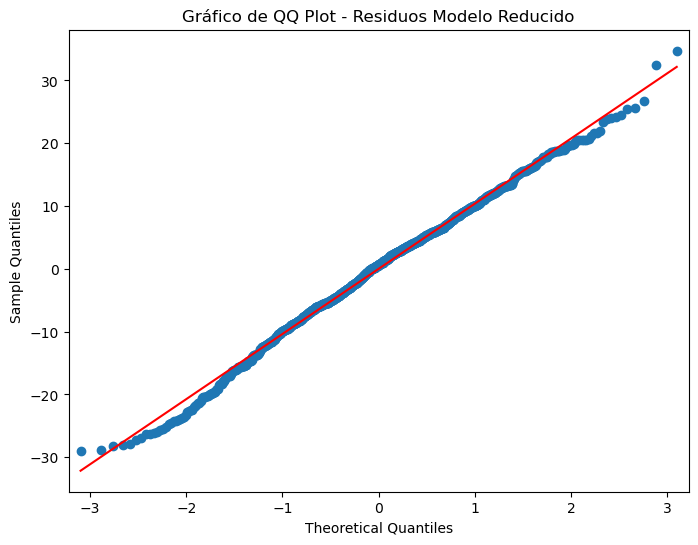

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#Residuos del modelo de regresión reducido

residuos = results_reduced.resid

# Gráfico QQ Plot 

fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico de QQ Plot - Residuos Modelo Reducido')
plt.show()

**Análisis**

A partir de la prueba realizada correspondiente a Shapiro Wilks, se rechaza la hipótesis nula que planteaba un comportamiento normal en la distribución de los errores. Sin embargo, al analizar el gráfico Q-Q Plot, se observa que la mayoría de los cuantiles teóricos y observados para los términos de error están alineados con la línea de referencia. Es decir, que es posible concluir que los términos de error del modelo propuesto demuestran o sugieren un comportamiento normal.

**Prueba de Media Cero:**

A través del One Sample T-Test se busca probar el supuesto de media cero en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la media de los errores del modelo es cero
- H1: la media de los errores del modelo es distinta de cero

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [16]:
#One Sample T-Test

from scipy import stats


residuos = results_reduced.resid

# Prueba de One Sample T-Test

t_statistic, p_valor = stats.ttest_1samp(residuos, 0)


print("Estadístico t:", t_statistic)
print("P-Value:", p_valor)

Estadístico t: 5.426463010503265e-14
P-Value: 0.9999999999999567


**Análisis**

Teniendo en cuenta el resultado obtenido en el P-Value, no hay suficiente evidencia para rechazar la hipótesis nula planteada. Por tanto, el supuesto de media cero en los errores del modelo se cumple.

**Prueba de Homocedasticidad**

A través de la prueba de Breusch Pagan se busca probar el supuesto varianza constante en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la varianza de los errores es constante (homocedasticidad)
- H1: la varianza de los errores no es constante (heterocedasticidad)

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [17]:
#A través de este código se utiliza el método .exog que accede a la matriz de variables independientes del modelo

bp_test = sm.stats.diagnostic.het_breuschpagan(results_reduced.resid, results_reduced.model.exog)
print("Estadístico de prueba de Breusch-Pagan:", bp_test[0])
print("P-Value:", bp_test[1])

Estadístico de prueba de Breusch-Pagan: 139.18162251188608
P-Value: 1.4915855798339575e-27


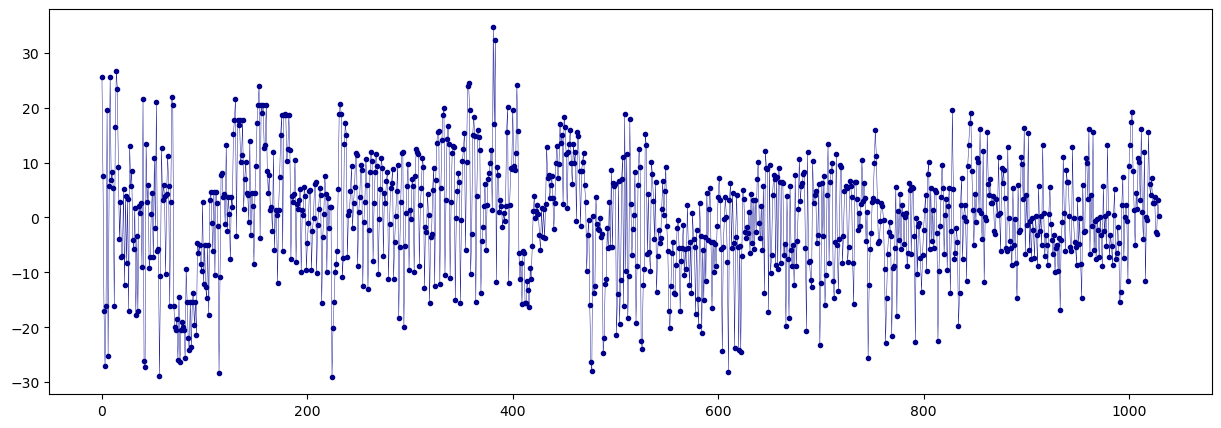

In [18]:
plt.figure(figsize=(15,5))
plt.plot(results_reduced.resid, '.-', color ="darkblue", linewidth=0.3)
plt.show()

**Análisis**


A partir del resultado de la prueba de homocedasticidad, se obtuvo un valor lo suficientemente pequeño para rechazar la hipótesis nula, es decir, hay presencia de heterocedasticidad en los errores. Adicionalmente, en términos gráficos se puede concluir que el comportamiento de la variabilidad de los errores no es constante.


**Conclusiones generales de las pruebas**


A través de la validación realizada de los supuestos asociados a los residuales del modelo reducido, se encontró que ninguno de estos se cumple teniendo en cuenta las pruebas realizadas. Las implicaciones de estos resultaods son las siguientes:

* En el caso de la falta de independencia en los errores, esto implica revisar otros tipos de modelos que eventualmente puedan capturar de forma más efectiva las estructuras de dependencia que existen en los datos planteados para este ejercicio. 

* El incumplimiento del supuesto de normalidad, sugiere la necesidad de buscar alternativas en las características de los datos, tales como transformaciones a las variables, debido a que el modelo puede que no esté capturando de forma óptima la variabilidad de los datos. 

* La ausencia de media cero por su parte, evidencia una incorrecta especificación del modelo propuesto y evidencia la necesidad de considerar nuevas variables en el planteamiento del mismo. 

* Finalmente, la ausencia de varianza constante en los errores también supone una necesidad de revisar modelos más robustos que puedan capturar los diferentes comportamientos que tienen los errores en términos de variabilidad con respecto a las variables predictoras.

#### **Enfoque Robusto:**

In [19]:
#Paso 1. Estandarización de las variables


from sklearn.preprocessing import StandardScaler


# Se seleccionan las variables predictoras del modelo

X = df_concrete[['Cement', 'Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Age']]

# Inicializa el objeto StandardScaler

scaler = StandardScaler()

# Se ajusta el escalador a los datos y se transforman

X_scaled = scaler.fit_transform(X)

# Creación de nuevos nombres para distinguirlos de los originales

new_column_names = [name + '_E' for name in X.columns]

# Creación de un nuevo data frame con las variables estandarizadas

X_scaled_df = pd.DataFrame(X_scaled, columns=new_column_names)

In [20]:
# Revisamos que se hayan renombrado correctamente las variables

X_scaled_df.head(5)

,Cement_E,Slag_E,Fly_Ash_E,Water_E,Superplasticizer_E,Age_E
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,4.978487


In [21]:
# Añadir la variable predictora original al data frame estandarizado

X_scaled_df['Compressive strength'] = df_concrete['Compressive strength']

In [22]:
X_scaled_df.head(5)

,Cement_E,Slag_E,Fly_Ash_E,Water_E,Superplasticizer_E,Age_E,Compressive strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733,79.986111
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733,61.887366
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,3.553066,40.269535
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,5.057677,41.052780
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,4.978487,44.296075


In [23]:
#Reordenamos las variables

X_scaled_df = X_scaled_df[['Compressive strength', 'Cement_E', 'Slag_E', 'Fly_Ash_E', 'Water_E', 'Superplasticizer_E','Age_E']]
X_scaled_df.head(5)

,Compressive strength,Cement_E,Slag_E,Fly_Ash_E,Water_E,Superplasticizer_E,Age_E
0,79.986111,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733
1,61.887366,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,-0.279733
2,40.269535,0.491443,0.795533,-0.847132,2.175367,-1.038944,3.553066
3,41.052780,0.491443,0.795533,-0.847132,2.175367,-1.038944,5.057677
4,44.296075,-0.790432,0.678414,-0.847132,0.488805,-1.038944,4.978487


In [24]:
#Calculamos las matrices de correlación a través del coeficiente de Spearman

corr = X_scaled_df.corr(method= "spearman")
corr

,Compressive strength,Cement_E,Slag_E,Fly_Ash_E,Water_E,Superplasticizer_E,Age_E
Compressive strength,1.000000,0.477601,0.162473,-0.077957,-0.308371,0.347589,0.596020
Cement_E,0.477601,1.000000,-0.250407,-0.418352,-0.094417,0.038397,0.004631
Slag_E,0.162473,-0.250407,1.000000,-0.247313,0.049426,0.093568,-0.017424
Fly_Ash_E,-0.077957,-0.418352,-0.247313,1.000000,-0.283085,0.454713,0.002802
Water_E,-0.308371,-0.094417,0.049426,-0.283085,1.000000,-0.687060,0.090939
Superplasticizer_E,0.347589,0.038397,0.093568,0.454713,-0.687060,1.000000,-0.009753
Age_E,0.596020,0.004631,-0.017424,0.002802,0.090939,-0.009753,1.000000


In [25]:
#Renombramos la matriz de covarianzas como Sigma para facilitar el entendimiento respecto a la formula definida para hallar los coeficientes

Sigma = corr

Sigma

,Compressive strength,Cement_E,Slag_E,Fly_Ash_E,Water_E,Superplasticizer_E,Age_E
Compressive strength,1.000000,0.477601,0.162473,-0.077957,-0.308371,0.347589,0.596020
Cement_E,0.477601,1.000000,-0.250407,-0.418352,-0.094417,0.038397,0.004631
Slag_E,0.162473,-0.250407,1.000000,-0.247313,0.049426,0.093568,-0.017424
Fly_Ash_E,-0.077957,-0.418352,-0.247313,1.000000,-0.283085,0.454713,0.002802
Water_E,-0.308371,-0.094417,0.049426,-0.283085,1.000000,-0.687060,0.090939
Superplasticizer_E,0.347589,0.038397,0.093568,0.454713,-0.687060,1.000000,-0.009753
Age_E,0.596020,0.004631,-0.017424,0.002802,0.090939,-0.009753,1.000000


In [26]:
#Para poder realizar el paso posterior, debemos pasar la matriz anterior a un arreglo tipo Numpy 

Sigma = Sigma.to_numpy()

In [27]:
Sigma

array([[ 1.        ,  0.47760116,  0.16247343, -0.07795675, -0.30837067,
         0.34758892,  0.59601954],
       [ 0.47760116,  1.        , -0.25040725, -0.41835167, -0.09441678,
         0.03839716,  0.00463067],
       [ 0.16247343, -0.25040725,  1.        , -0.24731281,  0.04942609,
         0.093568  , -0.01742443],
       [-0.07795675, -0.41835167, -0.24731281,  1.        , -0.28308461,
         0.45471292,  0.00280195],
       [-0.30837067, -0.09441678,  0.04942609, -0.28308461,  1.        ,
        -0.68705981,  0.09093886],
       [ 0.34758892,  0.03839716,  0.093568  ,  0.45471292, -0.68705981,
         1.        , -0.00975295],
       [ 0.59601954,  0.00463067, -0.01742443,  0.00280195,  0.09093886,
        -0.00975295,  1.        ]])

In [28]:
#Matriz de covarianza para las variables de entrada

SigmaXX = Sigma[1:, 1:]

#Vector de covarianzas entre las variables de entrada y la variable respuesta

SigmaXy = Sigma[1:, 0]

#Estimación betas de las variables de entrada, que sale de realizar la multiplicación de sigma XX (invertida) por sigma Xy para hallar los betas

betas= np.matmul(np.linalg.inv(SigmaXX), SigmaXy)

betas

array([ 0.62688197,  0.38601384,  0.19128868, -0.24395635,  0.03887093,
        0.62187096])

Ahora bien, con el objetivo de interpretar los coeficientes en las unidades originales del ejercicio, se procede a desestandarizarlos. Este proceso se lleva a cabo múltiplicando el coeficiente estandarizado por el ratio entre la desviación estandar de la variable respuesta original y la desviación estandar de la variable explicativa original según corresponda. 

In [29]:
# Desviaciones estándar originales de las variables predictoras y la variable de dependiente

desviacion_y = np.std(df_concrete['Compressive strength'])  
desviaciones_x = np.std(df_concrete[['Cement', 'Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Age']])  

# Desestandarización de los coeficientes

coeficientes_desestandarizados = betas * (desviacion_y / desviaciones_x)

# Imprimir coeficientes desestandarizados
print("Coeficientes desestandarizados:")
print(coeficientes_desestandarizados)

Coeficientes desestandarizados:
Cement              0.100208
Slag                0.074741
Fly_Ash             0.049934
Water              -0.190838
Superplasticizer    0.108708
Age                 0.164458
dtype: float64


Para el cálculo del intercepto, utilizamos la formula que indica la resta entre la mediana de la variable dependiente y el producto entre la mediana de las variables independientes y los coeficientes estimados en el punto anterior. En este caso, usamos la mediana debido a que la misma es menos sensible a los valores atípicos que existan en el conjunto de datos. 

In [39]:
# Calcular las medianas de las variables predictoras estandarizadas

x_bar = df_concrete[["Cement", "Slag", "Fly_Ash", "Water", "Superplasticizer", "Age"]].median()

# Calcular el intercepto

intercepto = df_concrete["Compressive strength"].median() - np.dot(x_bar.to_numpy(), betas)

# Imprimir el intercepto

print("Intercepto:", intercepto)

Intercepto: -117.65291406345


**Análisis**

| Modelo | RLM OLS | RLM Robusta | 
|:-----:|:-----:|:-----:|
| Intercepto | 0.612 | -117.652 |
| Cement | 0.1054 |0.100208 | 
| Slag | 0.0865 |0.074741 |
| Fly_Ash | 0.0687 |0.049934 | 
| Water | -0.2183 |-0.190838 |
| Superplasticizer | 0.2390 |0.108708 | 
| Age | 0.1135 |0.164458 |

La conveniencia de utilizar un enfoque robusto en este ejercicio, radica en la necesidad de evitar los efectos que pueden generar los valores atípicos de los datos y corregir los posibles sesgos que pueden ser generados por el incumplimineto de los supuestos que surgieron en la estimación por mínimos cuadrados ordinarios. 

Sin embargo, es importante mencionar que la estabilización de los coeficientes a través de métodos robustos no asegura la correción de los problemas asociados al incumplimiento de los supuestos del modeo por MCO. 

**Bibliografía**

Amaya Jiménez, L. (2018). Criterio de Akaike para la selección de modelos con transformaciones (Doctoral dissertation, Universidad Santo Tomás).

Granados, R. M. (2016). Modelos de regresión lineal múltiple. Granada, España: Departamento de Economía Aplicada, Universidad de Granada.

Sarabia Collazo, A. A. Indice de inmunidad-inflamación sistémica como predictor independiente de morbimortalidad en neumonía por COVID-19. 